#### Анализ временного ряда на автокорреляцию и построению авторегрессионных моделей. Все по ценам закрытия.

In [ ]:
%load_ext IPython.extensions.autoreload
%autoreload 2
import datetime as dt
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import numpy as np

from data import FinData

The IPython.extensions.autoreload extension is already loaded. To reload it, use:
  %reload_ext IPython.extensions.autoreload


In [40]:
data = FinData("../datasets/T_yandex_10min.csv")
data.insert_stat_close_price()
data.check_stationarity(columns=["stat_close_price"])

KeyboardInterrupt: 

1.1) Функция на подсчет автокорреляций для подбора лагов 

In [3]:
def calculate_autocorrelation(df, column, lags):
    """
    Вычисляет коэффициенты автокорреляции для заданной колонки датафрейма на указанных лагах.

    Параметры:
        df (pd.DataFrame): Входной датафрейм.
        column (str): Название колонки для анализа.
        lags (list): Список лагов, для которых нужно вычислить автокорреляцию.

    Выводит коэффициенты автокорреляции для каждого лага.
    """
    if column not in df.columns:
        raise ValueError(f"Колонка '{column}' отсутствует в датафрейме.")

    print(f"Коэффициенты автокорреляции для колонки '{column}':")
    for lag in lags:
        autocorr = df[column].autocorr(lag=lag)
        print(f"Лаг {lag}: {autocorr:.4f}")

In [7]:
lags = [2, 3, 4, 5, 6, 10, 20, 50, 1000, 2000]
calculate_autocorrelation(data.df, column="close", lags=lags)

Коэффициенты автокорреляции для колонки 'close':
Лаг 2: 0.9999
Лаг 3: 0.9999
Лаг 4: 0.9999
Лаг 5: 0.9999
Лаг 6: 0.9998
Лаг 10: 0.9997
Лаг 20: 0.9995
Лаг 50: 0.9987
Лаг 1000: 0.9722
Лаг 2000: 0.9411


Обрежем датасет до 2 месяцев и снова посмотрим значения коэффициентов автокорреляции

In [18]:
start_date = dt.datetime(2023, 2, 1)
end_date = dt.datetime(2023, 4, 1)

data.restrict_time_down(start_date)
data.restrict_time_up(end_date)

lags = [2, 3, 4, 5, 6, 10, 20, 50, 100, 500, 1000, 2000]
calculate_autocorrelation(data.df, column="close", lags=lags)

Коэффициенты автокорреляции для колонки 'close':
Лаг 2: 0.9885
Лаг 3: 0.9852
Лаг 4: 0.9818
Лаг 5: 0.9784
Лаг 6: 0.9750
Лаг 10: 0.9625
Лаг 20: 0.9350
Лаг 50: 0.8879
Лаг 100: 0.8063
Лаг 500: 0.4104
Лаг 1000: -0.3730
Лаг 2000: -0.0010


1.2) Статистический критерий Льюнга-Бокса на значимость автокорреляции

Если значение p-value критерия не превосходит $0.05$ (или другого заранее фиксированного порога значимости), то автокорреляция с лагом $x$ значима.

In [30]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [38]:
def ljung_box_test(df, column, lags):
    """
    Выполняет статистический тест Льюнга-Бокса на значимость автокорреляции.

    Параметры:
        df (pd.DataFrame): Входной датафрейм.
        column (str): Название колонки для анализа.
        lags (int) | : Максимальное количество лагов для теста.

    Выводит результаты теста для каждого лага.
    """
    lb_test = acorr_ljungbox(df[column].dropna(), lags=1000, return_df=True)
    
    print(f"Результаты теста Льюнга-Бокса для колонки '{column}':")
    for lag, p_value in zip(lb_test.index, lb_test['lb_pvalue']):
        res = "значима" if p_value < 0.05 else "незначима"
        print(f"Лаг {lag}: p-значение = {p_value:.4f} ({res})")

In [39]:
ljung_box_test(data.df, column="close", lags=lags)

Результаты теста Льюнга-Бокса для колонки 'close':
Лаг 1: p-значение = 0.0000 (значима)
Лаг 2: p-значение = 0.0000 (значима)
Лаг 3: p-значение = 0.0000 (значима)
Лаг 4: p-значение = 0.0000 (значима)
Лаг 5: p-значение = 0.0000 (значима)
Лаг 6: p-значение = 0.0000 (значима)
Лаг 7: p-значение = 0.0000 (значима)
Лаг 8: p-значение = 0.0000 (значима)
Лаг 9: p-значение = 0.0000 (значима)
Лаг 10: p-значение = 0.0000 (значима)
Лаг 11: p-значение = 0.0000 (значима)
Лаг 12: p-значение = 0.0000 (значима)
Лаг 13: p-значение = 0.0000 (значима)
Лаг 14: p-значение = 0.0000 (значима)
Лаг 15: p-значение = 0.0000 (значима)
Лаг 16: p-значение = 0.0000 (значима)
Лаг 17: p-значение = 0.0000 (значима)
Лаг 18: p-значение = 0.0000 (значима)
Лаг 19: p-значение = 0.0000 (значима)
Лаг 20: p-значение = 0.0000 (значима)
Лаг 21: p-значение = 0.0000 (значима)
Лаг 22: p-значение = 0.0000 (значима)
Лаг 23: p-значение = 0.0000 (значима)
Лаг 24: p-значение = 0.0000 (значима)
Лаг 25: p-значение = 0.0000 (значима)
Лаг 26: 

1.5) Автокорреляционная функция 

Автокорреляционная функция (АКФ) — зависимость взаимосвязи между функцией и её сдвинутой по аргументу функции копией от величины сдвига.

1.4) ACF-график (визуализация автокорреляционной функции) для наглядности

In [19]:
def visualize_acf(df, column, lags):
    """
    Строит график автокорреляционной функции (ACF) для заданной колонки датафрейма.

    Параметры:
        df (pd.DataFrame): Входной датафрейм.
        column (str): Название колонки для анализа.
        lags (int) | (array_like): Лаги для расчета ACF

    Выводит ACF-график.
    """
    if column not in df.columns:
        raise ValueError(f"Колонка '{column}' отсутствует в датафрейме.")

    plt.figure(figsize=(10, 6))
    plot_acf(df[column].dropna(), lags=lags)
    plt.title(f"Коррелограмма")
    plt.xlabel("Лаги")
    plt.ylabel("Автокорреляция")
    plt.grid()
    plt.show()

<Figure size 1000x600 with 0 Axes>

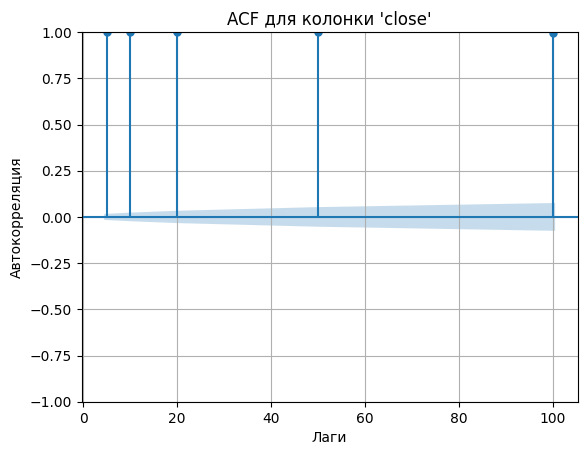

In [29]:
lags = np.array([5, 10, 20, 50, 100, 500, 700, 1000, 2000])
visualize_acf(data.df, column="close", lags=lags) 